In [1]:
# All import statements
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from pandas import datetime
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score
from scipy.stats import norm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


<ipython-input-1-09a679216d00>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
# Filepath and read
event_data_path = 'C:/Users/Chad/Downloads/TerroristClustersDataEventData.csv'
event_data = pd.read_csv(event_data_path)

# Filepath and read
death_data_path = 'C:/Users/Chad/Downloads/TerroristClustersDataDeathData.csv'
death_data = pd.read_csv(death_data_path)

In [3]:
event_data

,Cluster Name,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan Pakistan,995.0,1150.0,1214.0,1393.0,3111.0,3668.0,4032,3198,2634,2299,2557
1,Egypt Isreal Syria Iraq Turkey Georgia,1528.0,1336.0,1401.0,1637.0,2010.0,3733.0,5200,4480,4957,3177,1868
2,Somalia area,148.0,98.0,115.0,202.0,298.0,393.0,951,409,617,641,537
3,Ireland UK,NaN,NaN,59.0,68.0,77.0,160.0,134,143,112,137,104
4,East India Nepal Bangladesh,532.0,666.0,690.0,644.0,577.0,827.0,828,1254,977,1052,591
5,Philippines,271.0,226.0,201.0,133.0,243.0,642.0,595,719,639,687,600
6,Northern Malaysia Thailand,176.0,289.0,259.0,178.0,281.0,469.0,437,278,333,179,184
7,Columbia,130.0,137.0,132.0,82.0,87.0,142.0,228,131,111,103,216
8,Tunisa North Libya Serbia Macedonia Greece,NaN,NaN,NaN,NaN,NaN,362.0,696,593,407,242,121
9,Nigeria,NaN,NaN,NaN,145.0,578.0,281.0,638,722,548,577,848


In [4]:
death_data

,Cluster Name (DEATHS),2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan Pakistan,1312.0,1359.0,1286.0,1697.0,4758.0,5092.0,6027,5218,4599,4117,5792
1,Egypt Isreal Syria Iraq Turkey Georgia,1678.0,1308.0,1250.0,1415.0,2861.0,7026.0,8952,8550,9770,4999,1729
2,Somalia area,185.0,99.0,140.0,194.0,350.0,506.0,1304,534,784,782,722
3,Ireland UK,NaN,NaN,0.0,NaN,2.0,3.0,0,1,11,2,2
4,East India Nepal Bangladesh,372.0,455.0,459.0,344.0,209.0,306.0,276,301,358,364,238
5,Philippines,144.0,120.0,132.0,89.0,170.0,367.0,370,446,367,466,412
6,Northern Malaysia Thailand,132.0,260.0,156.0,178.0,195.0,213.0,197,98,113,77,68
7,Columbia,51.0,137.0,27.0,43.0,101.0,79.0,121,66,57,55,121
8,Tunisa North Libya Serbia Macedonia Greece,NaN,NaN,NaN,NaN,NaN,140.0,383,454,386,135,59
9,Nigeria,NaN,NaN,NaN,245.0,889.0,598.0,1940,3964,970,1423,1800


In [5]:
# Check data
#print(event_data)

X_years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
X_num = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
AP = event_data.loc[0, X_years]
EISITG = event_data.loc[1, X_years]
SA = event_data.loc[2, X_years]
IUK = event_data.loc[3, X_years]
EINB = event_data.loc[4, X_years]
PHIL = event_data.loc[5, X_years]
NMT = event_data.loc[6, X_years]
COL = event_data.loc[7, X_years]
TNLSMG = event_data.loc[8, X_years]
NIG = event_data.loc[9, X_years]
YNSSA = event_data.loc[10, X_years]
DRCSU = event_data.loc[11, X_years]
MBF = event_data.loc[12, X_years]

X = np.array(X_num)
X = X.astype(float)

EISITGy = np.array(EISITG)
EISITGy = EISITGy.astype(float)

SAy = np.array(SA)
SAy = SAy.astype(float)

IUKy = np.array(IUK)
IUKy = IUKy.astype(float)

EINBy = np.array(EINB)
EINBy = EINBy.astype(float)

PHILy = np.array(PHIL)
PHILy = PHILy.astype(float)

NMTy = np.array(NMT)
NMTy = NMTy.astype(float)

COLy = np.array(COL)
COLy = COLy.astype(float)

TNLSMGy = np.array(TNLSMG)
TNLSMGy = TNLSMGy.astype(float)

NIGy = np.array(NIG)
NIGy = NIGy.astype(float)

YNSSAy = np.array(YNSSA)
YNSSAy = YNSSAy.astype(float)

DRCSUy = np.array(DRCSU)
DRCSUy= DRCSUy.astype(float)

MBFy = np.array(MBF)
MBFy = MBFy.astype(float)

APy = np.array(AP)
APy = APy.astype(float)

print(APy)


[ 995. 1150. 1214. 1393. 3111. 3668. 4032. 3198. 2634. 2299. 2557.]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
[3504.91551277 4541.53134857 5880.35843816 6079.34652118 5472.34418803]
the arima prediction for 2017 is:  3504.915512770333
the absolute error of the arima model

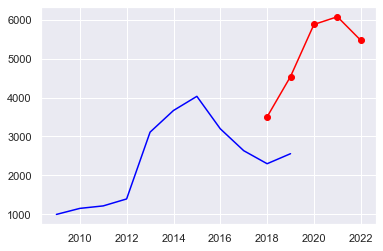

In [6]:
index= pd.date_range(start='1/1/2008', end='1/1/2017', freq='A')
index3 = pd.date_range(start='1/1/2008', end='1/1/2019', freq='A')
index2 = pd.date_range(start='1/1/2017', end='1/1/2022', freq='A')
ap_data = pd.Series(APy[:-2], index)

fit1 = ARIMA(ap_data,order=(4,1,0)).fit()
fcast1 = fit1.forecast(steps=5)
fcast2 = fcast1[0]
print(fcast1[0])


print('the arima prediction for 2017 is: ', fcast1[0][0])
print('the absolute error of the arima model for 2017 is: ', abs(fcast1[0][0]-APy[-2:-1]))
print('the arima prediction for 2018 is: ', fcast1[0][1])
print('the absolute error of the arima model for 2018 is: ', abs(fcast1[0][1]-APy[-1:]))

plt.plot(index3, APy, color='blue')
plt.plot(index2, fcast1[0], marker='o', color='red')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
2017-12-31    2792.644897
2018-12-31    2947.669607
2019-12-31    3102.694317
2020-12-31    3257.719027
2021-12-31    3412.743737
Freq: A-DEC, dtype: float64


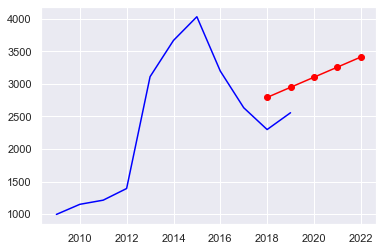

the ets prediction for 2017 is:  2792.6448971380996
the absolute error of the holt ets model for 2017 is:  [493.64489714]
the ets prediction for 2018 is:  2947.6696070007533
the absolute error of the holt ets model for 2018 is:  [390.669607]


In [7]:
index= pd.date_range(start='1/1/2008', end='1/1/2017', freq='A')
index3 = pd.date_range(start='1/1/2008', end='1/1/2019', freq='A')
index2 = pd.date_range(start='1/1/2017', end='1/1/2022', freq='A')
ap_data = pd.Series(APy[:-2], index)

fit1 = Holt(ap_data).fit()
fcast1 = fit1.forecast(5)
print(fcast1)

plt.plot(index3, APy, color='blue')
plt.plot(index2, fcast1.values, marker='o', color='red')
plt.show()

print('the ets prediction for 2017 is: ', fcast1[0])
print('the absolute error of the holt ets model for 2017 is: ', abs(fcast1[0]-APy[-2:-1]))
print('the ets prediction for 2018 is: ', fcast1[1])
print('the absolute error of the holt ets model for 2018 is: ', abs(fcast1[1]-APy[-1:]))

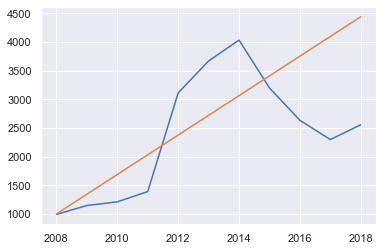

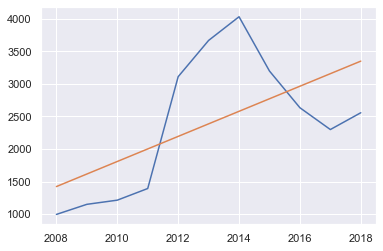

the r2 of the short model linear model is:  0.030845006973959976
the mean absolute error of the short linear model is:  815.8813131313073
the r2 of the full linear model is:  0.356479665077033
the mean absolute error of the full linear model is:  741.4148760330493
the full linear prediction for 2017 is:  [[3157.25454545]]
the absolute error of the full linear model for 2017 is:  [[858.25454545]]
the full linear prediction for 2018 is:  [[3349.95454545]]
the absolute error of the full linear model for 2018 is:  [[792.95454545]]
the linear prediction for 2019 is:  [[3542.65454545]]
the linear prediction for 2020 is:  [[3735.35454545]]
the linear prediction for 2021 is:  [[3928.05454545]]


In [8]:
ap_fit = LinearRegression()
short_ap_fit = LinearRegression()
X3 = X.reshape(-1,1)
Y3 = APy.reshape(-1, 1)
ap_fit.fit(X3, Y3)
short_ap_fit.fit(X3[:-2], Y3[:-2])
ap_model = ap_fit.predict(X3)
short_ap_model = short_ap_fit.predict(X3)

plt.plot(X3, Y3)
plt.plot(X3, short_ap_model)
plt.show()

plt.plot(X3, Y3)
plt.plot(X3, ap_model)
plt.show()

pred_2017 = ap_fit.predict([[2017]])
pred_2018 = ap_fit.predict([[2018]])
pred_2019 = ap_fit.predict([[2019]])
pred_2020 = ap_fit.predict([[2020]])
pred_2021 = ap_fit.predict([[2021]])

print('the r2 of the short model linear model is: ', r2_score(APy, short_ap_fit.predict(X3)))
print('the mean absolute error of the short linear model is: ', mean_absolute_error(APy, short_ap_fit.predict(X3)))
print('the r2 of the full linear model is: ', r2_score(APy, ap_fit.predict(X3)))
print('the mean absolute error of the full linear model is: ', mean_absolute_error(APy, ap_fit.predict(X3)))
print('the full linear prediction for 2017 is: ', pred_2017)
print('the absolute error of the full linear model for 2017 is: ', abs(pred_2017-APy[-2:-1]))
print('the full linear prediction for 2018 is: ', pred_2018)
print('the absolute error of the full linear model for 2018 is: ', abs(pred_2018-APy[-1:]))
print('the linear prediction for 2019 is: ', pred_2019)
print('the linear prediction for 2020 is: ', pred_2020)
print('the linear prediction for 2021 is: ', pred_2021)

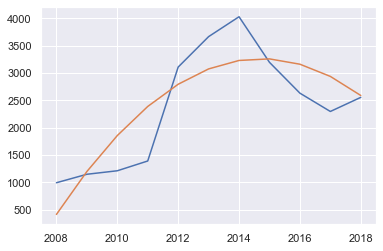

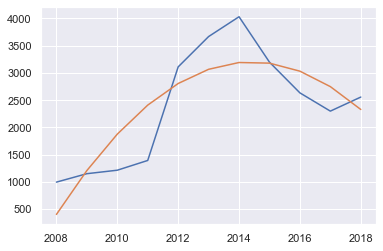

the r2 of the short model is:  0.691723595140606
the mean absolute error of the short model is:  476.69256217642265
the r2 of the full model is:  0.7032354229047848
the mean absolute error of the full model is:  469.9404111287811
the full polynomial prediction for 2017 is:  2748.953846156597
the absolute error of the full model for 2017 is:  [449.95384616]
the full polynomial prediction for 2018 is:  2329.2027972340584
the absolute error of the full model for 2018 is:  [227.79720277]
the polynomial prediction for 2019 is:  1773.3515152335167
the polynomial prediction for 2020 is:  1081.400000154972
the polynomial prediction for 2021 is:  253.34825199842453


In [9]:
#afghanistan pakistan events
ap_model = np.poly1d(np.polyfit(X, APy, 2))
short_ap_model = np.poly1d(np.polyfit(X[:-2], APy[:-2], 2))

plt.plot(X, APy)
plt.plot(X, short_ap_model(X))
plt.show()

plt.plot(X, APy)
plt.plot(X, ap_model(X))
plt.show()

pred_2017 = ap_model(2017)
pred_2018 = ap_model(2018)
pred_2019 = ap_model(2019)
pred_2020 = ap_model(2020)
pred_2021 = ap_model(2021)

print('the r2 of the short model is: ', r2_score(APy, short_ap_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(APy, short_ap_model(X_num)))
print('the r2 of the full model is: ', r2_score(APy, ap_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(APy, ap_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(ap_model(2017)-APy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(ap_model(2018)-APy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

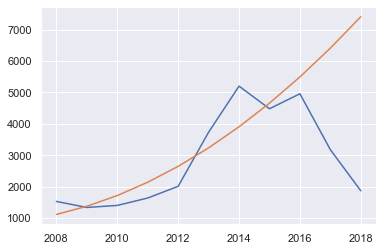

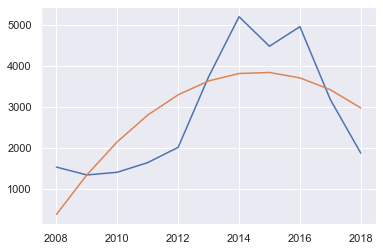

the r2 of the short model is:  -0.9464232685367999
the mean absolute error of the short model is:  1199.0588744472373
the r2 of the full model is:  0.5579296982092987
the mean absolute error of the full model is:  824.7360881946304
the full polynomial prediction for 2017 is:  3417.8363636136055
the absolute error of the full model for 2017 is:  [240.83636361]
the full polynomial prediction for 2018 is:  2972.363636434078
the absolute error of the full model for 2018 is:  [1104.36363643]
the polynomial prediction for 2019 is:  2370.103030562401
the polynomial prediction for 2020 is:  1611.0545458197594
the polynomial prediction for 2021 is:  695.2181823849678


In [10]:
#egypt isreal syria iraq turkey georgia
eisitg_model = np.poly1d(np.polyfit(X, EISITGy, 2))
short_eisitg_model = np.poly1d(np.polyfit(X[:-2], EISITGy[:-2], 2))

plt.plot(X, EISITGy)
plt.plot(X, short_eisitg_model(X))
plt.show()

plt.plot(X, EISITGy)
plt.plot(X, eisitg_model(X))
plt.show()

pred_2017 = eisitg_model(2017)
pred_2018 = eisitg_model(2018)
pred_2019 = eisitg_model(2019)
pred_2020 = eisitg_model(2020)
pred_2021 = eisitg_model(2021)

print('the r2 of the short model is: ', r2_score(EISITGy, short_eisitg_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(EISITGy, short_eisitg_model(X_num)))
print('the r2 of the full model is: ', r2_score(EISITGy, eisitg_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(EISITGy, eisitg_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(eisitg_model(2017)-EISITGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(eisitg_model(2018)-EISITGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)


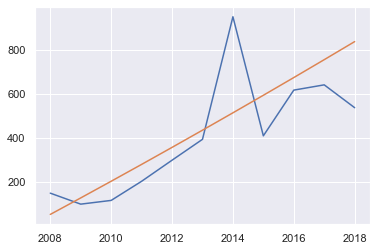

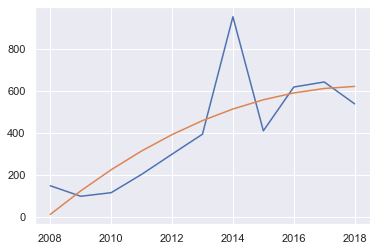

the r2 of the short model is:  0.49381248452416815
the mean absolute error of the short model is:  134.8726879259021
the r2 of the full model is:  0.6090859405939755
the mean absolute error of the full model is:  115.19643992930651
the full polynomial prediction for 2017 is:  610.1048951223493
the absolute error of the full model for 2017 is:  [30.89510488]
the full polynomial prediction for 2018 is:  619.9440559707582
the absolute error of the full model for 2018 is:  [82.94405597]
the polynomial prediction for 2019 is:  618.4545454904437
the polynomial prediction for 2020 is:  605.6363636814058
the polynomial prediction for 2021 is:  581.489510551095


In [11]:
#somalia area
sa_model = np.poly1d(np.polyfit(X, SAy, 2))
short_sa_model = np.poly1d(np.polyfit(X[:-2], SAy[:-2], 2))

plt.plot(X, SAy)
plt.plot(X, short_sa_model(X))
plt.show()

plt.plot(X, SAy)
plt.plot(X, sa_model(X))
plt.show()

pred_2017 = sa_model(2017)
pred_2018 = sa_model(2018)
pred_2019 = sa_model(2019)
pred_2020 = sa_model(2020)
pred_2021 = sa_model(2021)

print('the r2 of the short model is: ', r2_score(SAy, short_sa_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(SAy, short_sa_model(X_num)))
print('the r2 of the full model is: ', r2_score(SAy, sa_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(SAy, sa_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(sa_model(2017)-SAy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(sa_model(2018)-SAy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

In [12]:
#ireland uk
iuk_model = np.poly1d(np.polyfit(X[2:], IUKy[2:], 2))
short_iuk_model = np.poly1d(np.polyfit(X[2:-2], IUKy[2:-2], 2))

pred_2017 = iuk_model(2017)
pred_2018 = iuk_model(2018)
pred_2019 = iuk_model(2019)
pred_2020 = iuk_model(2020)
pred_2021 = iuk_model(2021)

print('the r2 of the short model is: ', r2_score(IUKy[2:], short_iuk_model(X[2:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(IUKy[2:], short_iuk_model(X_num[2:])))
print('the r2 of the full model is: ', r2_score(IUKy[2:], iuk_model(X[2:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(IUKy[2:], iuk_model(X_num[2:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(iuk_model(2017)-IUKy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(iuk_model(2018)-IUKy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.4857322318850046
the mean absolute error of the short model is:  20.788359788970816
the r2 of the full model is:  0.699070196793017
the mean absolute error of the full model is:  14.613756614426771
the full polynomial prediction for 2017 is:  124.00000000745058
the absolute error of the full model for 2017 is:  [12.99999999]
the full polynomial prediction for 2018 is:  106.00000000745058
the absolute error of the full model for 2018 is:  [2.00000001]
the polynomial prediction for 2019 is:  80.76190476864576
the polynomial prediction for 2020 is:  48.28571429103613
the polynomial prediction for 2021 is:  8.571428574621677


In [13]:
#east india nepal bangladesh
einb_model = np.poly1d(np.polyfit(X, EINBy, 2))
short_einb_model = np.poly1d(np.polyfit(X[:-2], EINBy[:-2], 2))

pred_2017 = einb_model(2017)
pred_2018 = einb_model(2018)
pred_2019 = einb_model(2019)
pred_2020 = einb_model(2020)
pred_2021 = einb_model(2021)

print('the r2 of the short model is: ', r2_score(EINBy, short_einb_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(EINBy, short_einb_model(X_num)))
print('the r2 of the full model is: ', r2_score(EINBy, einb_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(EINBy, einb_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(einb_model(2017)-EINBy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(einb_model(2018)-EINBy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -0.5753152743584602
the mean absolute error of the short model is:  168.33722941204906
the r2 of the full model is:  0.40854034942053263
the mean absolute error of the full model is:  131.65043440596625
the full polynomial prediction for 2017 is:  889.274125892669
the absolute error of the full model for 2017 is:  [162.72587411]
the full polynomial prediction for 2018 is:  855.6853147149086
the absolute error of the full model for 2018 is:  [264.68531471]
the polynomial prediction for 2019 is:  806.2060606479645
the polynomial prediction for 2020 is:  740.8363636955619
the polynomial prediction for 2021 is:  659.5762238577008


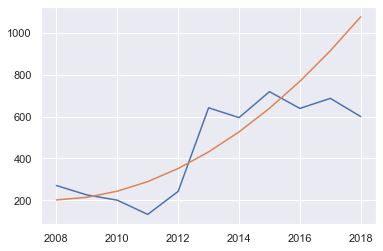

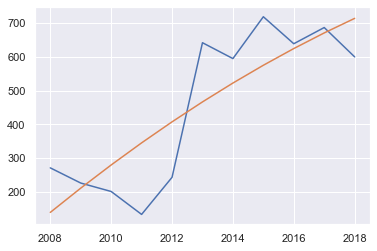

the r2 of the short model is:  0.25937364419359454
the mean absolute error of the short model is:  143.68453364548358
the r2 of the full model is:  0.6879242074877093
the mean absolute error of the full model is:  103.50209789951755
the full polynomial prediction for 2017 is:  671.030769245699
the absolute error of the full model for 2017 is:  [15.96923075]
the full polynomial prediction for 2018 is:  714.1678321929649
the absolute error of the full model for 2018 is:  [114.16783219]
the polynomial prediction for 2019 is:  754.1090909484774
the polynomial prediction for 2020 is:  790.854545510374
the polynomial prediction for 2021 is:  824.4041958777234


In [14]:
#philippines
phil_model = np.poly1d(np.polyfit(X, PHILy, 2))
short_phil_model = np.poly1d(np.polyfit(X[:-2], PHILy[:-2], 2))

plt.plot(X, PHILy)
plt.plot(X, short_phil_model(X))
plt.show()

plt.plot(X, PHILy)
plt.plot(X, phil_model(X))
plt.show()

pred_2017 = phil_model(2017)
pred_2018 = phil_model(2018)
pred_2019 = phil_model(2019)
pred_2020 = phil_model(2020)
pred_2021 = phil_model(2021)

print('the r2 of the short model is: ', r2_score(PHILy, short_phil_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(PHILy, short_phil_model(X_num)))
print('the r2 of the full model is: ', r2_score(PHILy, phil_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(PHILy, phil_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(phil_model(2017)-PHILy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(phil_model(2018)-PHILy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

In [15]:
#northern malaysia thailand
nmt_model = np.poly1d(np.polyfit(X, NMTy, 2))
short_nmt_model = np.poly1d(np.polyfit(X[:-2], NMTy[:-2], 2))

pred_2017 = nmt_model(2017)
pred_2018 = nmt_model(2018)
pred_2019 = nmt_model(2019)
pred_2020 = nmt_model(2020)
pred_2021 = nmt_model(2021)

print('the r2 of the short model is: ', r2_score(NMTy, short_nmt_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(NMTy, short_nmt_model(X_num)))
print('the r2 of the full model is: ', r2_score(NMTy, nmt_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(NMTy, nmt_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(nmt_model(2017)-NMTy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(nmt_model(2018)-NMTy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.19220893711651077
the mean absolute error of the short model is:  72.59984259476715
the r2 of the full model is:  0.44227329374746815
the mean absolute error of the full model is:  60.769654583863236
the full polynomial prediction for 2017 is:  241.06713288649917
the absolute error of the full model for 2017 is:  [62.06713289]
the full polynomial prediction for 2018 is:  176.89510491862893
the absolute error of the full model for 2018 is:  [7.10489508]
the polynomial prediction for 2019 is:  98.10303033143282
the polynomial prediction for 2020 is:  4.6909091249108315
the polynomial prediction for 2021 is:  -103.34125869721174


In [16]:
#columbia
col_model = np.poly1d(np.polyfit(X, COLy, 2))
short_col_model = np.poly1d(np.polyfit(X[:-2], COLy[:-2], 2))

pred_2017 = col_model(2017)
pred_2018 = col_model(2018)
pred_2019 = col_model(2019)
pred_2020 = col_model(2020)
pred_2021 = col_model(2021)

print('the r2 of the short model is: ', r2_score(COLy, short_col_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(COLy, short_col_model(X_num)))
print('the r2 of the full model is: ', r2_score(COLy, col_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(COLy, col_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(col_model(2017)-COLy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(col_model(2018)-COLy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.09728075875171882
the mean absolute error of the short model is:  33.294490358400665
the r2 of the full model is:  0.12986990428530187
the mean absolute error of the full model is:  32.19538037800653
the full polynomial prediction for 2017 is:  159.33566433470696
the absolute error of the full model for 2017 is:  [56.33566433]
the full polynomial prediction for 2018 is:  172.56643356429413
the absolute error of the full model for 2018 is:  [43.43356644]
the polynomial prediction for 2019 is:  187.7878787848167
the polynomial prediction for 2020 is:  204.9999999962747
the polynomial prediction for 2021 is:  224.2027971977368


In [17]:
#Tunisa North Libya Serbia Macedonia Greece
tnlsmg_model = np.poly1d(np.polyfit(X[5:], TNLSMGy[5:], 2))
short_tnlsmg_model = np.poly1d(np.polyfit(X[5:-2], TNLSMGy[5:-2], 2))

pred_2017 = tnlsmg_model(2017)
pred_2018 = tnlsmg_model(2018)
pred_2019 = tnlsmg_model(2019)
pred_2020 = tnlsmg_model(2020)
pred_2021 = tnlsmg_model(2021)

print('the r2 of the short model is: ', r2_score(TNLSMGy[5:], short_tnlsmg_model(X[5:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(TNLSMGy[5:], short_tnlsmg_model(X_num[5:])))
print('the r2 of the full model is: ', r2_score(TNLSMGy[5:], tnlsmg_model(X[5:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(TNLSMGy[5:], tnlsmg_model(X_num[5:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(tnlsmg_model(2017)-TNLSMGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(tnlsmg_model(2018)-TNLSMGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -4.21209458462505
the mean absolute error of the short model is:  256.0666669209798
the r2 of the full model is:  0.8034050634212277
the mean absolute error of the full model is:  79.60952381789684
the full polynomial prediction for 2017 is:  315.54999992251396
the absolute error of the full model for 2017 is:  [73.54999992]
the full polynomial prediction for 2018 is:  56.67857137322426
the absolute error of the full model for 2018 is:  [64.32142863]
the polynomial prediction for 2019 is:  -292.30000004172325
the polynomial prediction for 2020 is:  -731.3857142627239
the polynomial prediction for 2021 is:  -1260.5785713493824


In [18]:
#nigeria
nig_model = np.poly1d(np.polyfit(X[3:], NIGy[3:], 2))
short_nig_model = np.poly1d(np.polyfit(X[3:-2], NIGy[3:-2], 2))

pred_2017 = nig_model(2017)
pred_2018 = nig_model(2018)
pred_2019 = nig_model(2019)
pred_2020 = nig_model(2020)
pred_2021 = nig_model(2021)

print('the r2 of the short model is: ', r2_score(NIGy[3:], short_nig_model(X[3:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(NIGy[3:], short_nig_model(X_num[3:])))
print('the r2 of the full model is: ', r2_score(NIGy[3:], nig_model(X[3:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(NIGy[3:], nig_model(X_num[3:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(nig_model(2017)-NIGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(nig_model(2018)-NIGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.07947942787689533
the mean absolute error of the short model is:  150.12142856232822
the r2 of the full model is:  0.5738294085284535
the mean absolute error of the full model is:  133.59523809421808
the full polynomial prediction for 2017 is:  707.7440476380289
the absolute error of the full model for 2017 is:  [130.74404764]
the full polynomial prediction for 2018 is:  734.6250000149012
the absolute error of the full model for 2018 is:  [113.37499999]
the polynomial prediction for 2019 is:  747.4464285857975
the polynomial prediction for 2020 is:  746.2083333395422
the polynomial prediction for 2021 is:  730.9107142873108


In [19]:
#ynssa yemen north somalia saudi arabia
ynssa_model = np.poly1d(np.polyfit(X[2:], YNSSAy[2:], 2))
short_ynssa_model = np.poly1d(np.polyfit(X[2:-2], YNSSAy[2:-2], 2))

pred_2017 = ynssa_model(2017)
pred_2018 = ynssa_model(2018)
pred_2019 = ynssa_model(2019)
pred_2020 = ynssa_model(2020)
pred_2021 = ynssa_model(2021)

print('the r2 of the short model is: ', r2_score(YNSSAy[2:], short_ynssa_model(X[2:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(YNSSAy[2:], short_ynssa_model(X_num[2:])))
print('the r2 of the full model is: ', r2_score(YNSSAy[2:], ynssa_model(X[2:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(YNSSAy[2:], ynssa_model(X_num[2:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(ynssa_model(2017)-YNSSAy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(ynssa_model(2018)-YNSSAy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.6322913950137572
the mean absolute error of the short model is:  122.57142856385973
the r2 of the full model is:  0.6493972812913318
the mean absolute error of the full model is:  123.21693122055795
the full polynomial prediction for 2017 is:  466.03030303120613
the absolute error of the full model for 2017 is:  [193.03030303]
the full polynomial prediction for 2018 is:  287.7878787815571
the absolute error of the full model for 2018 is:  [109.21212122]
the polynomial prediction for 2019 is:  50.28571426868439
the polynomial prediction for 2020 is:  -246.47619050741196
the polynomial prediction for 2021 is:  -602.4978355318308


In [20]:
#drcsu DRC southern uganda
drcsu_model = np.poly1d(np.polyfit(X[6:], DRCSUy[6:], 2))
short_drcsu_model = np.poly1d(np.polyfit(X[6:-2], DRCSUy[6:-2], 2))

pred_2017 = drcsu_model(2017)
pred_2018 = drcsu_model(2018)
pred_2019 = drcsu_model(2019)
pred_2020 = drcsu_model(2020)
pred_2021 = drcsu_model(2021)

print('the r2 of the short model is: ', r2_score(DRCSUy[6:], short_drcsu_model(X[6:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(DRCSUy[6:], short_drcsu_model(X_num[6:])))
print('the r2 of the full model is: ', r2_score(DRCSUy[6:], drcsu_model(X[6:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(DRCSUy[6:], drcsu_model(X_num[6:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(drcsu_model(2017)-DRCSUy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(drcsu_model(2018)-DRCSUy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -3.524359116914967
the mean absolute error of the short model is:  70.80000001192093
the r2 of the full model is:  0.6198681431957362
the mean absolute error of the full model is:  39.18857145011425
the full polynomial prediction for 2017 is:  230.4285713583231
the absolute error of the full model for 2017 is:  [72.42857136]
the full polynomial prediction for 2018 is:  134.3428570330143
the absolute error of the full model for 2018 is:  [32.65714297]
the polynomial prediction for 2019 is:  -27.600000113248825
the polynomial prediction for 2020 is:  -255.40000015497208
the polynomial prediction for 2021 is:  -549.0571430325508


In [21]:
#mbf Mali Burkina Faso
mbf_model = np.poly1d(np.polyfit(X[6:], MBFy[6:], 2))
short_mbf_model = np.poly1d(np.polyfit(X[6:-2], MBFy[6:-2], 2))

pred_2017 = mbf_model(2017)
pred_2018 = mbf_model(2018)
pred_2019 = mbf_model(2019)
pred_2020 = mbf_model(2020)
pred_2021 = mbf_model(2021)

print('the r2 of the short model is: ', r2_score(MBFy[6:], short_mbf_model(X[6:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(MBFy[6:], short_mbf_model(X_num[6:])))
print('the r2 of the full model is: ', r2_score(MBFy[6:], mbf_model(X[6:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(MBFy[6:], mbf_model(X_num[6:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(mbf_model(2017)-MBFy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(mbf_model(2018)-MBFy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -2.3722987481386215
the mean absolute error of the short model is:  55.20000000298023
the r2 of the full model is:  0.9655539708510997
the mean absolute error of the full model is:  7.954285720735788
the full polynomial prediction for 2017 is:  154.25714287906885
the absolute error of the full model for 2017 is:  [8.74285712]
the full polynomial prediction for 2018 is:  206.8857143111527
the absolute error of the full model for 2018 is:  [1.88571431]
the polynomial prediction for 2019 is:  271.8000000305474
the polynomial prediction for 2020 is:  349.0000000372529
the polynomial prediction for 2021 is:  438.48571433499455


In [22]:
X_years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
X_num = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
AP = death_data.loc[0, X_years]
EISITG = death_data.loc[1, X_years]
SA = death_data.loc[2, X_years]
IUK = death_data.loc[3, X_years]
EINB = death_data.loc[4, X_years]
PHIL = death_data.loc[5, X_years]
NMT = death_data.loc[6, X_years]
COL = death_data.loc[7, X_years]
TNLSMG = death_data.loc[8, X_years]
NIG = death_data.loc[9, X_years]
YNSSA = death_data.loc[10, X_years]
DRCSU = death_data.loc[11, X_years]
MBF = death_data.loc[12, X_years]

X = np.array(X_num)
X = X.astype(float)

EISITGy = np.array(EISITG)
EISITGy = EISITGy.astype(float)

SAy = np.array(SA)
SAy = SAy.astype(float)

IUKy = np.array(IUK)
IUKy = IUKy.astype(float)

EINBy = np.array(EINB)
EINBy = EINBy.astype(float)

PHILy = np.array(PHIL)
PHILy = PHILy.astype(float)

NMTy = np.array(NMT)
NMTy = NMTy.astype(float)

COLy = np.array(COL)
COLy = COLy.astype(float)

TNLSMGy = np.array(TNLSMG)
TNLSMGy = TNLSMGy.astype(float)

NIGy = np.array(NIG)
NIGy = NIGy.astype(float)

YNSSAy = np.array(YNSSA)
YNSSAy = YNSSAy.astype(float)

DRCSUy = np.array(DRCSU)
DRCSUy= DRCSUy.astype(float)

MBFy = np.array(MBF)
MBFy = MBFy.astype(float)

APy = np.array(AP)
APy = APy.astype(float)

print(APy)

[1312. 1359. 1286. 1697. 4758. 5092. 6027. 5218. 4599. 4117. 5792.]


In [23]:
#afghanistan pakistan deaths
ap_model = np.poly1d(np.polyfit(X, APy, 2))
short_ap_model = np.poly1d(np.polyfit(X[:-2], APy[:-2], 2))
#rand_for_ap_model = 

pred_2017 = ap_model(2017)
pred_2018 = ap_model(2018)
pred_2019 = ap_model(2019)
pred_2020 = ap_model(2020)
pred_2021 = ap_model(2021)

print('the r2 of the short model is: ', r2_score(APy, short_ap_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(APy, short_ap_model(X_num)))
print('the r2 of the full model is: ', r2_score(APy, ap_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(APy, ap_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(ap_model(2017)-APy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(ap_model(2018)-APy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.7465744665679446
the mean absolute error of the short model is:  799.4718614654107
the r2 of the full model is:  0.7522393044639587
the mean absolute error of the full model is:  817.2178003544158
the full polynomial prediction for 2017 is:  5238.765035271645
the absolute error of the full model for 2017 is:  [1121.76503527]
the full polynomial prediction for 2018 is:  5121.776224166155
the absolute error of the full model for 2018 is:  [670.22377583]
the polynomial prediction for 2019 is:  4874.381818622351
the polynomial prediction for 2020 is:  4496.581818699837
the polynomial prediction for 2021 is:  3988.3762244284153


In [24]:
#egypt isreal syria iraq turkey georgia
eisitg_model = np.poly1d(np.polyfit(X, EISITGy, 2))
short_eisitg_model = np.poly1d(np.polyfit(X[:-2], EISITGy[:-2], 2))

pred_2017 = eisitg_model(2017)
pred_2018 = eisitg_model(2018)
pred_2019 = eisitg_model(2019)
pred_2020 = eisitg_model(2020)
pred_2021 = eisitg_model(2021)

print('the r2 of the short model is: ', r2_score(EISITGy, short_eisitg_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(EISITGy, short_eisitg_model(X_num)))
print('the r2 of the full model is: ', r2_score(EISITGy, eisitg_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(EISITGy, eisitg_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(eisitg_model(2017)-EISITGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(eisitg_model(2018)-EISITGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -1.2918993188659615
the mean absolute error of the short model is:  2836.5437228733845
the r2 of the full model is:  0.5285807780224842
the mean absolute error of the full model is:  2000.3568552732468
the full polynomial prediction for 2017 is:  5611.482517361641
the absolute error of the full model for 2017 is:  [612.48251736]
the full polynomial prediction for 2018 is:  4503.524475574493
the absolute error of the full model for 2018 is:  [2774.52447557]
the polynomial prediction for 2019 is:  3026.242424726486
the polynomial prediction for 2020 is:  1179.6363644599915
the polynomial prediction for 2021 is:  -1036.2937049865723


In [25]:
#somalia area
sa_model = np.poly1d(np.polyfit(X, SAy, 2))
short_sa_model = np.poly1d(np.polyfit(X[:-2], SAy[:-2], 2))

pred_2017 = sa_model(2017)
pred_2018 = sa_model(2018)
pred_2019 = sa_model(2019)
pred_2020 = sa_model(2020)
pred_2021 = sa_model(2021)

print('the r2 of the short model is: ', r2_score(SAy, short_sa_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(SAy, short_sa_model(X_num)))
print('the r2 of the full model is: ', r2_score(SAy, sa_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(SAy, sa_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(sa_model(2017)-SAy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(sa_model(2018)-SAy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.4439614943311052
the mean absolute error of the short model is:  199.11904762676832
the r2 of the full model is:  0.5731123396629394
the mean absolute error of the full model is:  157.1596524803476
the full polynomial prediction for 2017 is:  791.3608391880989
the absolute error of the full model for 2017 is:  [9.36083919]
the full polynomial prediction for 2018 is:  806.4475524872541
the absolute error of the full model for 2018 is:  [84.44755249]
the polynomial prediction for 2019 is:  806.7393939904869
the polynomial prediction for 2020 is:  792.2363637015224
the polynomial prediction for 2021 is:  762.9384616240859


In [26]:
#ireland uk
iuk_model = np.poly1d(np.polyfit(X[4:], IUKy[4:], 2))
short_iuk_model = np.poly1d(np.polyfit(X[4:-2], IUKy[4:-2], 2))

pred_2017 = iuk_model(2017)
pred_2018 = iuk_model(2018)
pred_2019 = iuk_model(2019)
pred_2020 = iuk_model(2020)
pred_2021 = iuk_model(2021)

print('the r2 of the short model is: ', r2_score(IUKy[4:], short_iuk_model(X[4:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(IUKy[4:], short_iuk_model(X_num[4:])))
print('the r2 of the full model is: ', r2_score(IUKy[4:], iuk_model(X[4:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(IUKy[4:], iuk_model(X_num[4:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(iuk_model(2017)-IUKy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(iuk_model(2018)-IUKy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -14.011357165408986
the mean absolute error of the short model is:  7.865306128082531
the r2 of the full model is:  0.07916666666119243
the mean absolute error of the full model is:  2.4829931972282275
the full polynomial prediction for 2017 is:  3.642857142491266
the absolute error of the full model for 2017 is:  [1.64285714]
the full polynomial prediction for 2018 is:  2.9523809521924704
the absolute error of the full model for 2018 is:  [0.95238095]
the polynomial prediction for 2019 is:  1.857142857159488
the polynomial prediction for 2020 is:  0.3571428577415645
the polynomial prediction for 2021 is:  -1.5476190466433764


In [27]:
#east india nepal bangladesh
einb_model = np.poly1d(np.polyfit(X, EINBy, 2))
short_einb_model = np.poly1d(np.polyfit(X[:-2], EINBy[:-2], 2))

pred_2017 = einb_model(2017)
pred_2018 = einb_model(2018)
pred_2019 = einb_model(2019)
pred_2020 = einb_model(2020)
pred_2021 = einb_model(2021)

print('the r2 of the short model is: ', r2_score(EINBy, short_einb_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(EINBy, short_einb_model(X_num)))
print('the r2 of the full model is: ', r2_score(EINBy, einb_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(EINBy, einb_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(einb_model(2017)-EINBy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(einb_model(2018)-EINBy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.11590242430049524
the mean absolute error of the short model is:  52.731365599754184
the r2 of the full model is:  0.3339220754841995
the mean absolute error of the full model is:  50.71235431121154
the full polynomial prediction for 2017 is:  299.06853146478534
the absolute error of the full model for 2017 is:  [64.93146854]
the full polynomial prediction for 2018 is:  307.2167832106352
the absolute error of the full model for 2018 is:  [69.21678321]
the polynomial prediction for 2019 is:  319.91515150666237
the polynomial prediction for 2020 is:  337.16363635100424
the polynomial prediction for 2021 is:  358.9622377473861


In [28]:
#philippines
phil_model = np.poly1d(np.polyfit(X, PHILy, 2))
short_phil_model = np.poly1d(np.polyfit(X[:-2], PHILy[:-2], 2))

pred_2017 = phil_model(2017)
pred_2018 = phil_model(2018)
pred_2019 = phil_model(2019)
pred_2020 = phil_model(2020)
pred_2021 = phil_model(2021)

print('the r2 of the short model is: ', r2_score(PHILy, short_phil_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(PHILy, short_phil_model(X_num)))
print('the r2 of the full model is: ', r2_score(PHILy, phil_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(PHILy, phil_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(phil_model(2017)-PHILy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(phil_model(2018)-PHILy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.6448076216471158
the mean absolute error of the short model is:  68.16147185912864
the r2 of the full model is:  0.7895358612112269
the mean absolute error of the full model is:  56.585463021437384
the full polynomial prediction for 2017 is:  435.52167832595296
the absolute error of the full model for 2017 is:  [30.47832167]
the full polynomial prediction for 2018 is:  470.9860139954835
the absolute error of the full model for 2018 is:  [58.986014]
the polynomial prediction for 2019 is:  505.5575757732149
the polynomial prediction for 2020 is:  539.2363636591472
the polynomial prediction for 2021 is:  572.0223776537459


In [29]:
#northern malaysia thailand
nmt_model = np.poly1d(np.polyfit(X, NMTy, 2))
short_nmt_model = np.poly1d(np.polyfit(X[:-2], NMTy[:-2], 2))

pred_2017 = nmt_model(2017)
pred_2018 = nmt_model(2018)
pred_2019 = nmt_model(2019)
pred_2020 = nmt_model(2020)
pred_2021 = nmt_model(2021)

print('the r2 of the short model is: ', r2_score(NMTy, short_nmt_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(NMTy, short_nmt_model(X_num)))
print('the r2 of the full model is: ', r2_score(NMTy, nmt_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(NMTy, nmt_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(nmt_model(2017)-NMTy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(nmt_model(2018)-NMTy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.5327774725282239
the mean absolute error of the short model is:  34.00787091627717
the r2 of the full model is:  0.6393700609020385
the mean absolute error of the full model is:  28.629201103171166
the full polynomial prediction for 2017 is:  86.76363637112081
the absolute error of the full model for 2017 is:  [9.76363637]
the full polynomial prediction for 2018 is:  47.72727273404598
the absolute error of the full model for 2018 is:  [20.27272727]
the polynomial prediction for 2019 is:  2.72121212631464
the polynomial prediction for 2020 is:  -48.25454545021057
the polynomial prediction for 2021 is:  -105.1999999973923


In [30]:
#columbia
col_model = np.poly1d(np.polyfit(X, COLy, 2))
short_col_model = np.poly1d(np.polyfit(X[:-2], COLy[:-2], 2))

pred_2017 = col_model(2017)
pred_2018 = col_model(2018)
pred_2019 = col_model(2019)
pred_2020 = col_model(2020)
pred_2021 = col_model(2021)

print('the r2 of the short model is: ', r2_score(COLy, short_col_model(X)))
print('the mean absolute error of the short model is: ', mean_absolute_error(COLy, short_col_model(X_num)))
print('the r2 of the full model is: ', r2_score(COLy, col_model(X)))
print('the mean absolute error of the full model is: ', mean_absolute_error(COLy, col_model(X_num)))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(col_model(2017)-COLy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(col_model(2018)-COLy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -0.14986348767786484
the mean absolute error of the short model is:  29.74655647436157
the r2 of the full model is:  0.025227655188395537
the mean absolute error of the full model is:  30.73863106558565
the full polynomial prediction for 2017 is:  85.91328671155497
the absolute error of the full model for 2017 is:  [30.91328671]
the full polynomial prediction for 2018 is:  89.69230768946
the absolute error of the full model for 2018 is:  [31.30769231]
the polynomial prediction for 2019 is:  93.95151514722966
the polynomial prediction for 2020 is:  98.69090908498038
the polynomial prediction for 2021 is:  103.91048950259574


In [31]:
#Tunisa North Libya Serbia Macedonia Greece
tnlsmg_model = np.poly1d(np.polyfit(X[5:], TNLSMGy[5:], 2))
short_tnlsmg_model = np.poly1d(np.polyfit(X[5:-2], TNLSMGy[5:-2], 2))

pred_2017 = tnlsmg_model(2017)
pred_2018 = tnlsmg_model(2018)
pred_2019 = tnlsmg_model(2019)
pred_2020 = tnlsmg_model(2020)
pred_2021 = tnlsmg_model(2021)

print('the r2 of the short model is: ', r2_score(TNLSMGy[5:], short_tnlsmg_model(X[5:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(TNLSMGy[5:], short_tnlsmg_model(X_num[5:])))
print('the r2 of the full model is: ', r2_score(TNLSMGy[5:], tnlsmg_model(X[5:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(TNLSMGy[5:], tnlsmg_model(X_num[5:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(tnlsmg_model(2017)-TNLSMGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(tnlsmg_model(2018)-TNLSMGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.3907321700296792
the mean absolute error of the short model is:  53.800000031789146
the r2 of the full model is:  0.863672822232491
the mean absolute error of the full model is:  47.16190482676029
the full polynomial prediction for 2017 is:  241.66428551077843
the absolute error of the full model for 2017 is:  [106.66428551]
the full polynomial prediction for 2018 is:  0.9642855525016785
the absolute error of the full model for 2018 is:  [58.03571445]
the polynomial prediction for 2019 is:  -342.7000001370907
the polynomial prediction for 2020 is:  -789.3285715281963
the polynomial prediction for 2021 is:  -1338.9214286208153


In [32]:
#nigeria
nig_model = np.poly1d(np.polyfit(X[3:], NIGy[3:], 2))
short_nig_model = np.poly1d(np.polyfit(X[3:-2], NIGy[3:-2], 2))

pred_2017 = nig_model(2017)
pred_2018 = nig_model(2018)
pred_2019 = nig_model(2019)
pred_2020 = nig_model(2020)
pred_2021 = nig_model(2021)

print('the r2 of the short model is: ', r2_score(NIGy[3:], short_nig_model(X[3:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(NIGy[3:], short_nig_model(X_num[3:])))
print('the r2 of the full model is: ', r2_score(NIGy[3:], nig_model(X[3:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(NIGy[3:], nig_model(X_num[3:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(nig_model(2017)-NIGy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(nig_model(2018)-NIGy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.23812468878178528
the mean absolute error of the short model is:  713.1178570538759
the r2 of the full model is:  0.3725786410624655
the mean absolute error of the full model is:  616.367559492588
the full polynomial prediction for 2017 is:  1870.7559527754784
the absolute error of the full model for 2017 is:  [447.75595278]
the full polynomial prediction for 2018 is:  1441.041666984558
the absolute error of the full model for 2018 is:  [358.95833302]
the polynomial prediction for 2019 is:  801.8392859697342
the polynomial prediction for 2020 is:  -46.85119032859802
the polynomial prediction for 2021 is:  -1105.0297619104385


In [33]:
#ynssa yemen north somalia saudi arabia
ynssa_model = np.poly1d(np.polyfit(X[2:], YNSSAy[2:], 2))
short_ynssa_model = np.poly1d(np.polyfit(X[2:-2], YNSSAy[2:-2], 2))

pred_2017 = ynssa_model(2017)
pred_2018 = ynssa_model(2018)
pred_2019 = ynssa_model(2019)
pred_2020 = ynssa_model(2020)
pred_2021 = ynssa_model(2021)

print('the r2 of the short model is: ', r2_score(YNSSAy[2:], short_ynssa_model(X[2:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(YNSSAy[2:], short_ynssa_model(X_num[2:])))
print('the r2 of the full model is: ', r2_score(YNSSAy[2:], ynssa_model(X[2:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(YNSSAy[2:], ynssa_model(X_num[2:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(ynssa_model(2017)-YNSSAy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(ynssa_model(2018)-YNSSAy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.3794469312782641
the mean absolute error of the short model is:  261.0449735853407
the r2 of the full model is:  0.5647192528506686
the mean absolute error of the full model is:  191.35343916548624
the full polynomial prediction for 2017 is:  595.306060552597
the absolute error of the full model for 2017 is:  [132.30606055]
the full polynomial prediction for 2018 is:  325.6909090280533
the absolute error of the full model for 2018 is:  [20.30909097]
the polynomial prediction for 2019 is:  -32.452381014823914
the polynomial prediction for 2020 is:  -479.1238096356392
the polynomial prediction for 2021 is:  -1014.3233767747879


In [34]:
#drcsu DRC southern uganda
drcsu_model = np.poly1d(np.polyfit(X[6:], DRCSUy[6:], 2))
short_drcsu_model = np.poly1d(np.polyfit(X[6:-2], DRCSUy[6:-2], 2))

pred_2017 = drcsu_model(2017)
pred_2018 = drcsu_model(2018)
pred_2019 = drcsu_model(2019)
pred_2020 = drcsu_model(2020)
pred_2021 = drcsu_model(2021)

print('the r2 of the short model is: ', r2_score(DRCSUy[6:], short_drcsu_model(X[6:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(DRCSUy[6:], short_drcsu_model(X_num[6:])))
print('the r2 of the full model is: ', r2_score(DRCSUy[6:], drcsu_model(X[6:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(DRCSUy[6:], drcsu_model(X_num[6:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(drcsu_model(2017)-DRCSUy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(drcsu_model(2018)-DRCSUy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  -13.997408618739959
the mean absolute error of the short model is:  203.79999997615815
the r2 of the full model is:  0.5338947874722755
the mean absolute error of the full model is:  59.07428572177887
the full polynomial prediction for 2017 is:  318.71428564190865
the absolute error of the full model for 2017 is:  [101.71428564]
the full polynomial prediction for 2018 is:  213.77142849564552
the absolute error of the full model for 2018 is:  [49.2285715]
the polynomial prediction for 2019 is:  27.399999886751175
the polynomial prediction for 2020 is:  -240.40000012516975
the polynomial prediction for 2021 is:  -589.6285715997219


In [35]:
#mbf Mali Burkina Faso
mbf_model = np.poly1d(np.polyfit(X[6:], MBFy[6:], 2))
short_mbf_model = np.poly1d(np.polyfit(X[6:-2], MBFy[6:-2], 2))

pred_2017 = mbf_model(2017)
pred_2018 = mbf_model(2018)
pred_2019 = mbf_model(2019)
pred_2020 = mbf_model(2020)
pred_2021 = mbf_model(2021)

print('the r2 of the short model is: ', r2_score(MBFy[6:], short_mbf_model(X[6:])))
print('the mean absolute error of the short model is: ', mean_absolute_error(MBFy[6:], short_mbf_model(X_num[6:])))
print('the r2 of the full model is: ', r2_score(MBFy[6:], mbf_model(X[6:])))
print('the mean absolute error of the full model is: ', mean_absolute_error(MBFy[6:], mbf_model(X_num[6:])))
print('the full polynomial prediction for 2017 is: ', pred_2017)
print('the absolute error of the full model for 2017 is: ', abs(mbf_model(2017)-MBFy[-2:-1]))
print('the full polynomial prediction for 2018 is: ', pred_2018)
print('the absolute error of the full model for 2018 is: ', abs(mbf_model(2018)-MBFy[-1:]))
print('the polynomial prediction for 2019 is: ', pred_2019)
print('the polynomial prediction for 2020 is: ', pred_2020)
print('the polynomial prediction for 2021 is: ', pred_2021)

the r2 of the short model is:  0.7895241356822409
the mean absolute error of the short model is:  22.000000002980233
the r2 of the full model is:  0.987777180026745
the mean absolute error of the full model is:  6.560000000335276
the full polynomial prediction for 2017 is:  202.77142856922
the absolute error of the full model for 2017 is:  [14.22857143]
the full polynomial prediction for 2018 is:  253.2571428557858
the absolute error of the full model for 2018 is:  [5.25714286]
the polynomial prediction for 2019 is:  301.6000000014901
the polynomial prediction for 2020 is:  347.80000000540167
the polynomial prediction for 2021 is:  391.85714286658913


In [36]:
eisitg_event_2021 = 695
ap_event_2021 = 253
nig_event_2021 = 731
phil_event_2021 = 824
sa_event_2021 = 581
ynssa_event_2021 = -549
einb_event_2021 = 660
mbf_event_2021 = 438
tnlsmg_event_2021 = -1261
nmt_event_2021 = -103
drcsu_event_2021 = -549
iuk_event_2021 = 9
col_event_2021 = 224
